$$0=A+ B\chi_1 + \mu_{11}\chi_1^2 +\chi_1 \mu_{12}\chi_2+\chi_1 \mu_{13}\chi_3$$
$$0=A+ B\chi_2 + \chi_2 \mu_{21}\chi_1 +\mu_{22}\chi_2^2+\chi_2 \mu_{23}\chi_3$$
$$0=A+ B\chi_3 + \chi_3 \mu_{31}\chi_1 +\chi_3 \mu_{32}\chi_2+ \mu_{33}\chi_3^2$$

In [120]:
using ModelingToolkit, NonlinearSolve

@variables χ₁ χ₂ χ₃
@parameters A₁ A₂ B

μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856
μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601
μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

eqs = [
    0 ~ A₁ - B*χ₁ + μ₁₁*χ₁^2 + χ₁*μ₁₂*χ₂ + χ₁*μ₁₃*χ₃,
    0 ~ A₂ - B*χ₂ + χ₂*μ₂₁*χ₁ + μ₂₂*χ₂^2 + χ₂*μ₂₃*χ₃,
    0 ~ - B*χ₃ + χ₃*μ₃₁*χ₁ + χ₃*μ₃₂*χ₂ + μ₃₃*χ₃^2
]

@mtkbuild ns = NonlinearSystem(eqs, [χ₁, χ₂, χ₃], [A₁, A₂, B])

guess = [χ₁ => 20000, χ₂ => 80000, χ₃ => 0.0]
ps = [A₁ => 370.91, A₂ => 702.1, B => 0.255]

prob = NonlinearProblem(ns, guess, ps)
sol = solve(prob, NewtonRaphson())

retcode: MaxIters
u: 3-element Vector{Float64}:
  0.046634403901410715
 -0.0010649195525640476
  0.0

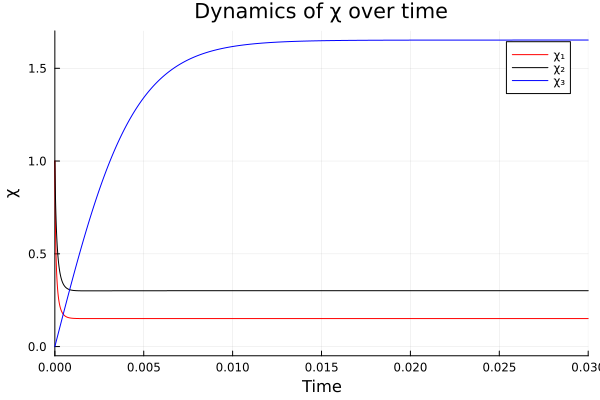

In [121]:
using DifferentialEquations, Plots

# Define the constants
μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856
μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601
μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

# Define the system as a function
function bcl2!(dχ, χ, p, t)
    χ₁, χ₂, χ₃ = χ
    A₁, A₂, B = p
    
    dχ[1] =  A₁ - (B*χ₁ + μ₁₁*χ₁^2 + χ₁*μ₁₂*χ₂) 
    dχ[2] =  A₂ - (B*χ₂ + χ₂*μ₂₁*χ₁ + μ₂₂*χ₂^2 - χ₂*μ₂₃*χ₃)
    dχ[3] =  A₁ - B*χ₃ + χ₃*μ₃₂*χ₂ - μ₃₃*χ₃^2
end

χ₀ = [1, 1, 0]
tspan = (0, 0.03)
params = [370.91, 702.10, 0.255]



# Define the ODE problem
prob = ODEProblem(bcl2!, χ₀ , tspan, params)
sol = solve(prob, Rodas4P(), reltol=1e-8, abstol=1e-8)

# Plot the dynamics of χ₃ as a function of time
# with colors RED, BLACK and BLUE
plot(sol, title="Dynamics of χ over time", xlabel="Time", ylabel="χ", legend=:topright, label=["χ₁" "χ₂" "χ₃"], color=[:red :black :blue])